In [71]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [72]:
data_dir = "dataset/train"
testdir = "dataset/test"
IMG_SHAPE = (100,100,1)
BATCH_SIZE = 32
# train_image = ImageDataGenerator(rescale=1./255,rotation_range=40,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
generator = ImageDataGenerator(rescale=1./255)
train_data = generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                        directory=data_dir, 
                                        shuffle=True, 
                                        target_size=IMG_SHAPE[:2], 
                                        color_mode="grayscale",
                                        class_mode='categorical')
test_data = generator.flow_from_directory(batch_size=BATCH_SIZE,
                                        directory=testdir,
                                        shuffle=False,
                                        target_size=IMG_SHAPE[:2],
                                        color_mode="grayscale",
                                        class_mode='categorical')
# print(dataset[0])

Found 1212 images belonging to 12 classes.
Found 220 images belonging to 12 classes.


In [73]:
totaltrain = 1212
totaltest = 220

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='softmax')
    ])
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               4333696   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [75]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
EPOCHS = 5
# BATCH_SIZE = 32
history = model.fit_generator(train_data,
    steps_per_epoch=int(np.ceil(totaltrain / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=test_data,
    validation_steps=int(np.ceil(totaltest / float(BATCH_SIZE)))
    )
model.save("TrainedModel/GestureRecogModel.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 38 steps, validate for 7 steps
Epoch 1/5
38/38 [==============================] - 18s 466ms/step - loss: 0.6943 - accuracy: 0.8441 - val_loss: 1.7182 - val_accuracy: 0.6273
Epoch 2/5
38/38 [==============================] - 11s 300ms/step - loss: 0.1076 - accuracy: 0.9992 - val_loss: 1.8964 - val_accuracy: 0.6364
Epoch 3/5
38/38 [==============================] - 12s 303ms/step - loss: 0.0618 - accuracy: 0.9992 - val_loss: 2.0951 - val_accuracy: 0.6364
Epoch 4/5
38/38 [==============================] - 11s 302ms/step - loss: 0.0415 - accuracy: 0.9992 - val_loss: 2.3711 - val_accuracy: 0.6364
Epoch 5/5
38/38 [==============================] - 11s 301ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 2.6804 - val_accuracy: 0.6364


In [76]:
tf.keras.utils.plot_model(model,show_shapes=True, dpi=60)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


<AxesSubplot:>

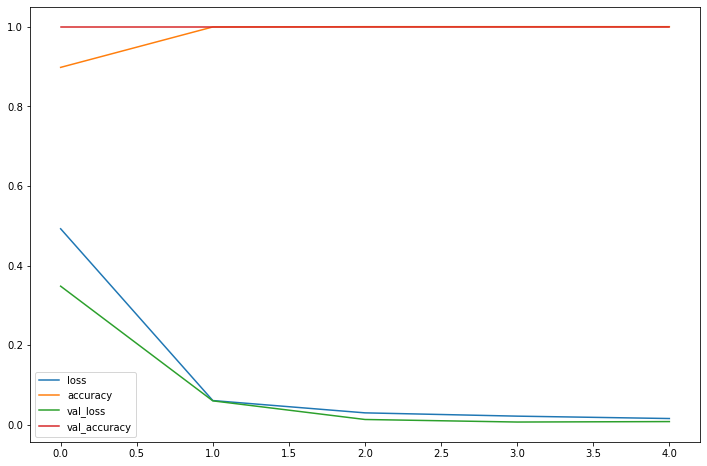

In [77]:
loss_df = pd.DataFrame(his.history)
loss_df.plot(figsize=(12,8))